In [1]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')

#2020 population of Catalonia from https://www.idescat.cat/pub/?id=aec&n=245
popCatalunya = 7722203

#Catalonia's health department data https://dadescovid.cat/descarregues
resp = urlopen("https://dadescovid.cat/static/csv/catalunya_diari_total_pob.zip")
zipfile = ZipFile(BytesIO(resp.read()))
file = zipfile.namelist()[0]
df = pd.read_csv(zipfile.open(file), sep=";")
df.head()

,NOM,CODI,DATA,SEXE,GRUP_EDAT,CASOS_CONFIRMAT,PCR,TAR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,...,INGRESSATS_CRITIC,EXITUS,CASOS_PCR,CASOS_TAR,POSITIVITAT_PCR_NUM,POSITIVITAT_TAR_NUM,POSITIVITAT_PCR_DEN,POSITIVITAT_TAR_DEN,VACUNATS_DOSI_1,VACUNATS_DOSI_2
0,CATALUNYA,GLOBAL,2021-02-02,Altres,NaN,41,180,10,0,2,...,33,0,11,30,11,0,176,10,0,3
1,CATALUNYA,GLOBAL,2021-02-02,Dona,Entre 15 i 64,480,1666,4010,0,4,...,65,0,38,442,34,302,1480,3600,486,5744
2,CATALUNYA,GLOBAL,2021-02-02,Dona,Entre 65 i 74,48,119,374,0,2,...,56,0,7,41,6,26,108,359,15,179
3,CATALUNYA,GLOBAL,2021-02-02,Dona,Majors de 74,89,272,591,0,0,...,36,1,28,61,17,32,229,513,123,1375
4,CATALUNYA,GLOBAL,2021-02-02,Dona,Menors de 15,86,160,583,0,0,...,0,0,20,66,15,48,150,569,0,0


In [2]:
df["DATA"] = pd.to_datetime(df["DATA"])
dfagg = df.groupby("DATA").agg(sum)
dfagg.tail()

,CASOS_CONFIRMAT,PCR,TAR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,INGRESSATS_TOTAL,INGRESSATS_CRITIC,EXITUS,CASOS_PCR,CASOS_TAR,POSITIVITAT_PCR_NUM,POSITIVITAT_TAR_NUM,POSITIVITAT_PCR_DEN,POSITIVITAT_TAR_DEN,VACUNATS_DOSI_1,VACUNATS_DOSI_2
DATA,,,,,,,,,,,,,,,,
2021-01-29,2903,39962,16545,235,59,2755,625,85,1555,1348,1894,1439,36390,15439,1310,15857
2021-01-30,1247,14447,5814,164,39,2901,639,79,616,631,708,602,13111,5339,861,7235
2021-01-31,767,5869,4108,123,37,3001,636,60,287,480,325,463,5328,3841,464,3864
2021-02-01,2265,22393,18909,160,57,2920,619,10,652,1613,702,1675,20123,17611,1402,9309
2021-02-02,1280,3825,9284,2,25,2806,612,1,176,1104,143,761,3419,8588,847,10125


In [3]:
dfaggvac = dfagg[dfagg["VACUNATS_DOSI_1"]>0]
dfaggvac.reset_index(inplace=True)
dfaggvac['Weekend'] = np.where(dfaggvac["DATA"].dt.weekday < 5,0,1)
dfaggvac["1st dose percent"] = dfaggvac["VACUNATS_DOSI_1"].cumsum()/popCatalunya*100
dfaggvac["2nd dose percent"] = dfaggvac["VACUNATS_DOSI_2"].cumsum()/popCatalunya*100

dfaggvac.head()

,DATA,CASOS_CONFIRMAT,PCR,TAR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,INGRESSATS_TOTAL,INGRESSATS_CRITIC,EXITUS,CASOS_PCR,CASOS_TAR,POSITIVITAT_PCR_NUM,POSITIVITAT_TAR_NUM,POSITIVITAT_PCR_DEN,POSITIVITAT_TAR_DEN,VACUNATS_DOSI_1,VACUNATS_DOSI_2,Weekend,1st dose percent,2nd dose percent
0,2020-12-27,1131,4998,4121,168,33,1757,321,42,404,727,331,573,4620,3896,803,0,1,0.010399,0.0
1,2020-12-28,4028,21863,19980,249,36,1803,335,47,1414,2614,1239,2377,19549,18550,1,0,0,0.010412,0.0
2,2020-12-29,3977,26512,19709,245,26,1820,335,44,1545,2432,1493,2300,23803,18179,447,0,0,0.016200,0.0
3,2020-12-30,3776,27728,19700,229,24,1805,328,47,1497,2279,1532,2232,24728,18467,2584,0,0,0.049662,0.0
4,2020-12-31,3407,22481,17187,229,38,1772,340,47,1446,1961,1628,2006,20144,16149,2591,0,0,0.083215,0.0


In [4]:
tidy = dfaggvac[["DATA","VACUNATS_DOSI_1","VACUNATS_DOSI_2"]]
tidy.columns = ["DATA","1st","2nd"]
tidy = tidy.melt(id_vars="DATA",ignore_index = False).rename(columns=str.title)
tidy.rename(columns = {'Variable': 'Dose'} , inplace=True)
tidy['Data'] = tidy['Data'].dt.strftime('%d-%b')


In [5]:
import matplotlib.ticker as ticker
from matplotlib import dates
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
sns.set_style('white')
dmax = max(dfaggvac["DATA"]) + pd.DateOffset(1)
dmin = min(dfaggvac["DATA"]) - pd.DateOffset(1)

<IPython.core.display.Javascript object>


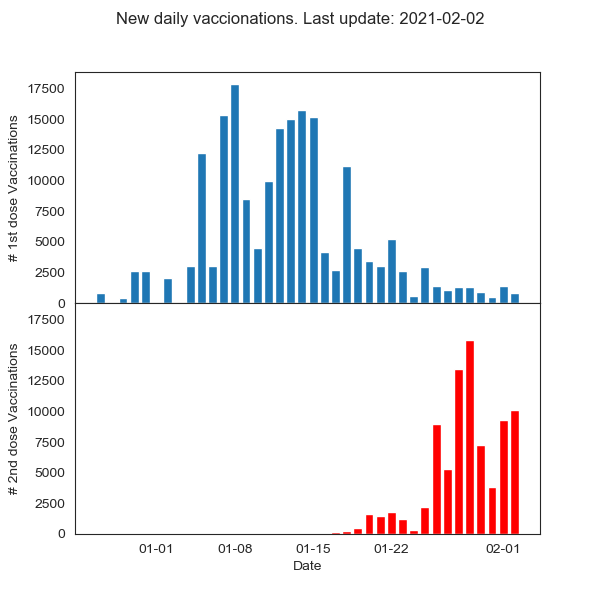

In [6]:
fig1, ax1 = plt.subplots(2,1,figsize=(6, 6), sharex=True)
date_form = DateFormatter("%m-%d")
# Remove horizontal space between axes
fig1.subplots_adjust(hspace=0)
fig1.suptitle("New daily vaccionations. Last update: " + max(dfaggvac["DATA"]).strftime("%Y-%m-%d"))

# Defining custom 'xlim' and 'ylim' values.
maxx = max(dfaggvac["VACUNATS_DOSI_1"].max(),dfaggvac["VACUNATS_DOSI_2"].max())
custom_ylim = (0, maxx+1000)

# Setting the values for all axes.
plt.setp(ax1, ylim=custom_ylim)

ax1[0].bar(x="DATA", height="VACUNATS_DOSI_1",data=dfaggvac)
ax1[0].set_ylabel("# 1st dose Vaccinations")
ax1[0].xaxis.set_major_formatter(date_form)

ax1[1].bar(x="DATA", height="VACUNATS_DOSI_2",data=dfaggvac, color="red")
ax1[1].set_xlabel("Date")
ax1[1].set_ylabel("# 2nd dose Vaccinations")
ax1[1].xaxis.set_major_formatter(date_form)

plt.show()

<IPython.core.display.Javascript object>


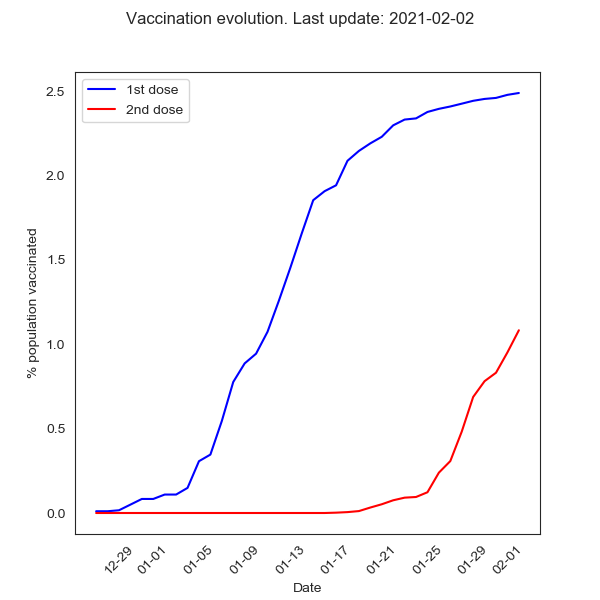

In [7]:
fig2, ax2 = plt.subplots(figsize=(6, 6))
fig2.suptitle("Vaccination evolution. Last update: " + max(dfaggvac["DATA"]).strftime("%Y-%m-%d"))

ax2.plot(dfaggvac["DATA"], dfaggvac["1st dose percent"], color="blue", label="1st dose")
ax2.plot(dfaggvac["DATA"], dfaggvac["2nd dose percent"], color="red", label="2nd dose")

ax2.set_xlabel("Date")
ax2.set_ylabel("% population vaccinated")
ax2.xaxis.set_major_formatter(date_form)
ax2.legend()
ax2.tick_params(axis="x",rotation=45)

plt.show()


<IPython.core.display.Javascript object>


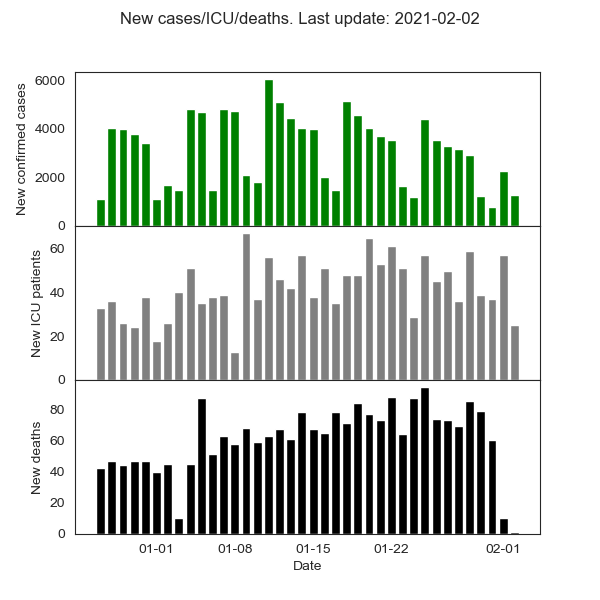

In [9]:
fig3, ax3 = plt.subplots(3,1,figsize=(6, 6), sharex=True)
date_form = DateFormatter("%m-%d")
# Remove horizontal space between axes
fig3.subplots_adjust(hspace=0)
fig3.suptitle("New cases/ICU/deaths. Last update: " + max(dfaggvac["DATA"]).strftime("%Y-%m-%d"))

ax3[0].bar(x="DATA", height="CASOS_CONFIRMAT",data=dfaggvac, color="green")
ax3[0].set_ylabel("New confirmed cases")

ax3[1].bar(x="DATA", height="INGRESSOS_CRITIC",data=dfaggvac, color="grey")
ax3[1].set_ylabel("New ICU patients")

ax3[2].bar(x="DATA", height="EXITUS",data=dfaggvac, color="black")
ax3[2].set_xlabel("Date")
ax3[2].set_ylabel("New deaths")
ax3[2].xaxis.set_major_formatter(date_form)

plt.show()